**Step 1: - Importing the data**
In this step we import the required libraries and the pandas data set with the help of pandas library.

In [3]:
# Importing the necessary libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans



In [4]:
# Reading th Iris data set.
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Step 2: - Visualising the data** In this step we try to visualise our data set.

In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 6)

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
# Dropping the label column because we are using unsupervised learning problem.
iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Step 3: - Finding the optimum number of clusters**
Before clustering the data using KMeans we need to specify the number of clusters. In order to find the optimum number of clusters there are various methods available like Silhoutte Coefficient and the Elbow method. Here the Elbow method is used.
---



**Elbow method: -**

---
The number of clusters varu within a certain range in this method. For each number, within cluster sum of square (WSS) value is calculated and stored in a list. These values are then plotted against the range of clusters used before. The bend locaion in the 2D-plot indicate the appropriate number of clusters.



In [16]:
# Calculating the Within-cluster Sum of Square
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
  km = KMeans(n_clusters=k)
  km = km.fit(iris_df)
  within_cluster_sum_of_square.append(km.inertia_)

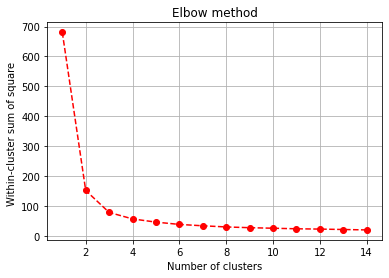

In [29]:
# Plotting the WSS against the clusters range.
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='red')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of square ")
plt.grid()
plt.show()

We can observe why it is called "The Elbow method" from the above 2-D plot, the optimum cluster is where the elbow occurs. This happens when the WSS doesn't decrease significantly with every iteration.

**Step 4: - Applying K means clustering on the data**


In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init= 10, random_state = 0)
predictions = model.fit_predict(iris_df)

**Step 5: - Visualising the clusters**

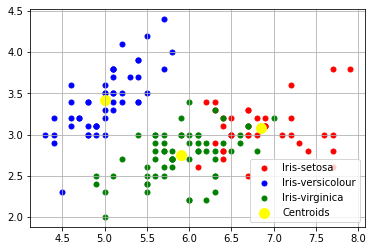

In [27]:
x = iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()